# A donut classification project

In [1]:
#https://github.com/NicholasConsiglio1201/Donut_Detection

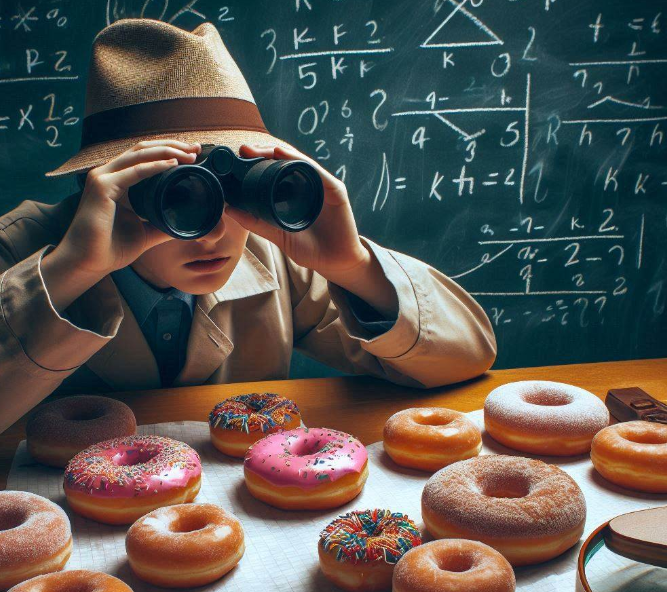

## Pip install and restart kernel

In [2]:
#pip install tensorflow

In [3]:
#pip install gradio

## Imports

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import gradio as gr

## Load the model

In [7]:
matts_donut_model = load_model('doughnut_model.h5', compile=False)

## Define a dictionary of our donuts

In [8]:
doughnuts = {
    0: 'cake_batter',
    1: 'chocolate_glazed',
    2: 'chocolate_glazed_sprinkles',
    3: 'original_glazed',
    4: 'strawberry_glazed_sprinkles'
}

## Function for the Model

In [16]:
def predict_class(model, images, class_map, show=True):
    for img_path in images:
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(299, 299))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0

        # Make the prediction
        pred = model.predict(img_array)
        index = np.argmax(pred)
        pred_value = class_map.get(index, "Unknown")
        top_prob = np.max(pred) * 100

        # If the confidence is low, handle uncertain predictions
        if top_prob < 20:
            img_original = image.load_img(img_path)
            plt.imshow(img_original)
            plt.axis('off')
            plt.show()
            print("This image may not contain a food trained in this model or may not contain food, otherwise please retake the picture and try again.")
        else:
            # Display the image and prediction
            if show:
                img_original = image.load_img(img_path)
                plt.imshow(img_original)
                plt.axis('off')
                plt.title(pred_value)
                plt.show()

            print(f"The model is {top_prob:.2f}% certain that the image is {pred_value}")


## Image list : ADD YOUR IMAGE FILES HERE! PNG/JPG/JPEG format

In [17]:
#Example
#images = [
    #'Cool_donut.jpeg',
    #'not_cool_donut.jpg',
    #'bagel.png'
#]



# List of images, put your files here
images = [
    ''
]


## Use the function and see the results!

1/1 [==============================] - 0s 65ms/step


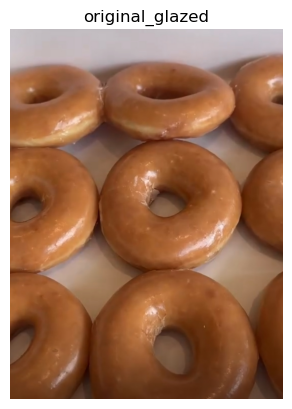

The model is 99.96% certain that the image is original_glazed


In [18]:
# Run predictions on the images and display the output
predict_class(matts_donut_model, images, doughnuts, True)

## Using a gradio interface to make the average user experience with the model better

In [19]:
matts_donut_model = load_model('doughnut_model.h5', compile=False)

# Define the class map for your doughnut model
doughnuts = {
    0: 'cake_batter',
    1: 'chocolate_glazed',
    2: 'chocolate_glazed_sprinkles',
    3: 'original_glazed',
    4: 'strawberry_glazed_sprinkles'
}

# Function to predict class of a single input image
def predict_doughnut(img):
    # Resize the input image to 299x299 as expected by the model
    img = img.resize((299, 299))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Make the prediction
    pred = Matts_donut_model.predict(img_array)
    index = np.argmax(pred)
    pred_value = doughnuts.get(index, "Unknown")
    top_prob = np.max(pred) * 100

    return f"The model is {top_prob:.2f}% certain that the image is {pred_value}"

# Gradio Interface
iface = gr.Interface(
    fn=predict_doughnut,
    inputs=gr.components.Image(type="pil"),  
    outputs="text",
    title="Doughnut Classifier",
    description="Upload an image of a doughnut, and the model will predict its type."
)

# Launch the interface
iface.launch(share=True)
